Step 1: Set up Notebook:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette('husl')
%matplotlib inline

Step 2: Load and first look into data

In [16]:
test_df = pd.read_csv('data/test.csv')
train_df = pd.read_csv('data/train.csv')


print("Dataset shape:", train_df.shape)
print("\nFirst 5 rows:")
train_df.head()

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: Basic Data Understanding

In [24]:
train_df.info()

print("\nMissing Values:")
print(train_df.isnull().sum())

print("Describing the dataset:")
train_df.describe()

print("Column names:")
print(train_df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2

Step 4: Understanding Target Variable (Survival Rate)

Survival Rate:
Survived
0    549
1    342
Name: count, dtype: int64

Overall survival rate: 38.38%


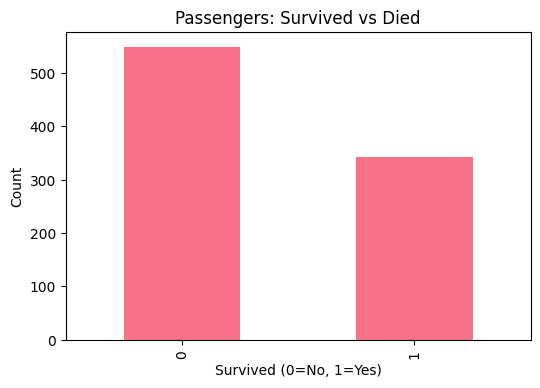

In [ ]:
print("Survival Rate:")

survival_rate = train_df['Survived'].value_counts()
print(survival_rate)
print(f"\nOverall survival rate: {train_df['Survived'].mean():.2%}")

plt.figure(figsize=(6, 4))

survival_rate.plot(kind='bar')
plt.title('Passengers: Survived vs Died')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')

plt.show()


Step 5: Did ... class affect survival?

For example gender, class, age... etc.?

In [35]:
survival_by_class = train_df.groupby('Pclass')['Survived'].agg(['count', 'sum', 'mean'])
print("Survival by Passenger Class: ")
print(survival_by_class)

survival_by_sex = train_df.groupby('Sex')['Survived'].agg(['count', 'sum', 'mean'])
print("\nSurvival by Gender:")
print(survival_by_sex)

Survival by Passenger Class: 
        count  sum      mean
Pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

Survival by Gender:
        count  sum      mean
Sex                         
female    314  233  0.742038
male      577  109  0.188908


As the results show, the first class passengers has survived drastically more compared to other classes. That being said, compared to males, females survived much more. 

Step 6: Visualization of different columns

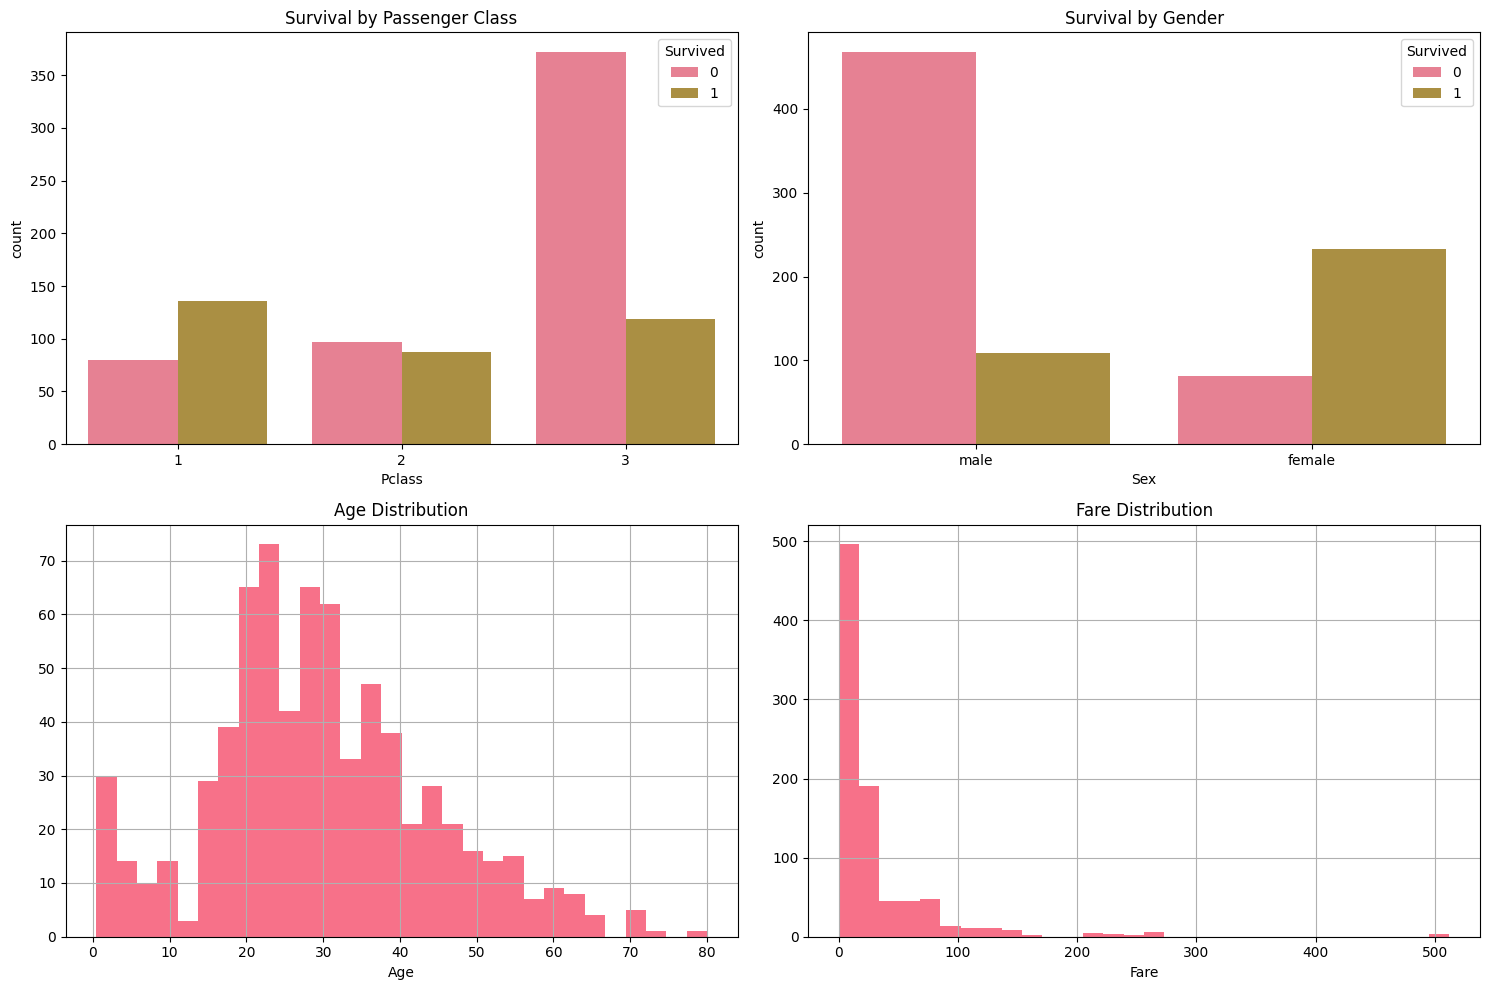

In [45]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived', ax = axes[0,0])
axes[0,0].set_title('Survival by Passenger Class')

sns.countplot(data = train_df, x = 'Sex', hue = 'Survived', ax = axes[0,1])
axes[0,1].set_title('Survival by Gender')

train_df['Age'].hist(bins = 30, ax = axes[1,0])
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')

train_df['Fare'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')

plt.tight_layout()
plt.show()

Step 6: Combined Effects

In [46]:
survival_class_gender = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean()
print("Survival Rate by Class AND Gender:")
print(survival_class_gender)

Survival Rate by Class AND Gender:
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


This is a remarkable result as %96.8 First class women has survived. Now let's visualize this as a heatmap:

Survival Rate Matrix:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


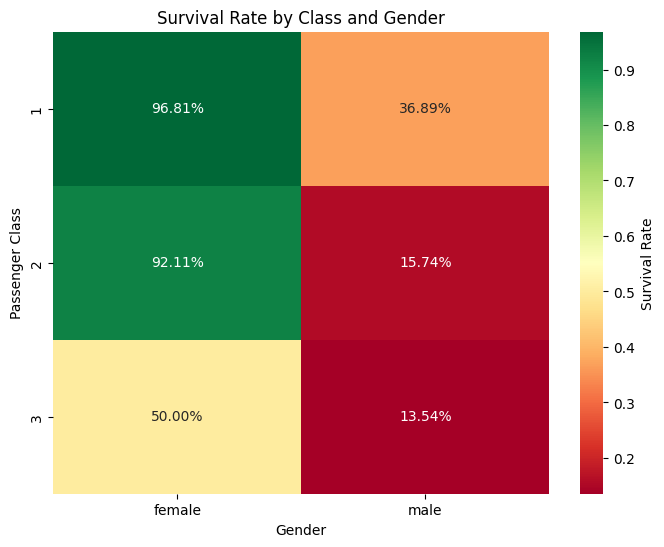

In [49]:
survival_pivot = train_df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print("Survival Rate Matrix:")
print(survival_pivot)

plt.figure(figsize = (8, 6))

sns.heatmap(survival_pivot, annot = True, cmap = 'RdYlGn', fmt = '.2%', cbar_kws = {'label': 'Survival Rate'})
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Passenger Class')
plt.xlabel('Gender')

plt.show()

Step 7: Age

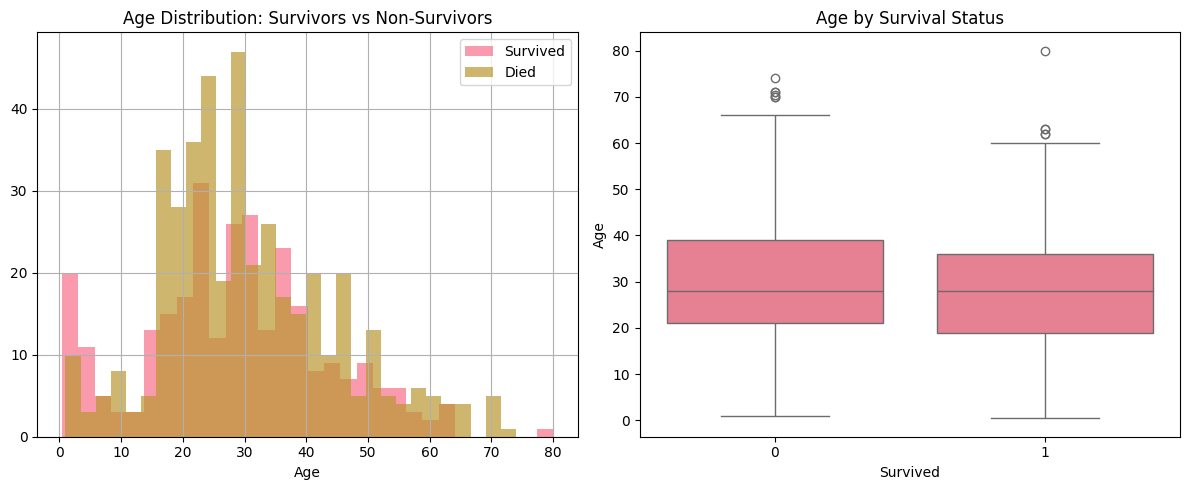

In [50]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

train_df[train_df['Survived']==1]['Age'].hist(alpha=0.7, label='Survived', bins=30)
train_df[train_df['Survived']==0]['Age'].hist(alpha=0.7, label='Died', bins=30)

plt.legend()
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.xlabel('Age')

plt.subplot(1, 2, 2)

sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title('Age by Survival Status')

plt.tight_layout()
plt.show()

Age mattered hugely as 'children first' was the idea!

Survival by Family Size:
            count   mean
FamilySize              
1             537  0.304
2             161  0.553
3             102  0.578
4              29  0.724
5              15  0.200
6              22  0.136
7              12  0.333
8               6  0.000
11              7  0.000


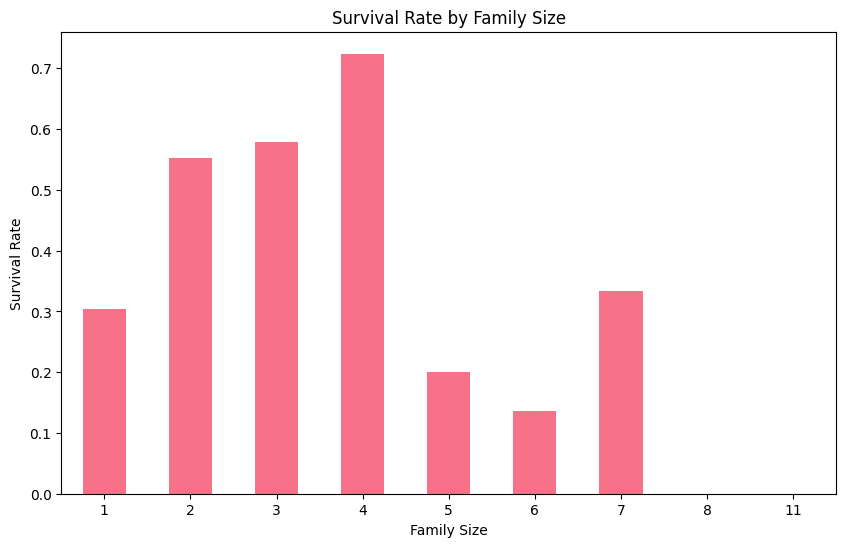

In [51]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

family_survival = train_df.groupby('FamilySize')['Survived'].agg(['count', 'mean']).round(3)
print("Survival by Family Size:")
print(family_survival)

plt.figure(figsize=(10, 6))
family_survival['mean'].plot(kind='bar')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

There seems to be an interesting correlation between family size and survival rate, as more children or family members they have does not mean their survival rate increases.

To test this theory:

In [52]:
print("Family Size by Class:")
print(train_df.groupby(['Pclass', 'FamilySize']).size().unstack(fill_value=0))

print("\nAverage class by family size:")
print(train_df.groupby('FamilySize')['Pclass'].mean())

Family Size by Class:
FamilySize   1   2   3   4   5   6   7   8   11
Pclass                                         
1           109  70  24   7   2   4   0   0   0
2           104  34  31  13   1   1   0   0   0
3           324  57  47   9  12  17  12   6   7

Average class by family size:
FamilySize
1     2.400372
2     1.919255
3     2.225490
4     2.068966
5     2.666667
6     2.590909
7     3.000000
8     3.000000
11    3.000000
Name: Pclass, dtype: float64


It seems that most people went by solo. 2 people travelling together seems to take some count in first class too. As the avg class by family size gets closer to 1, it is expected that the family size it is have a greater chance of survival. Such as 11 is 3 that is %0 survival rate.
2 is 1.9 which is a greate deal! But 4 is 2.06 despite being larger than 2 its avg class by family size is bigger. That means there seems to be psychological play here. Maybe parents insisted their wives or children to go first?
Let's test this theory:

In [53]:
# Let's look at families of size 4 more closely
family_4 = train_df[train_df['FamilySize'] == 4]
print("Family size 4 breakdown:")
print("Gender distribution:")
print(family_4['Sex'].value_counts())
print("\nAge statistics:")
print(family_4['Age'].describe())
print("\nSurvival by gender in size-4 families:")
print(family_4.groupby('Sex')['Survived'].agg(['count', 'mean']))

Family size 4 breakdown:
Gender distribution:
Sex
female    19
male      10
Name: count, dtype: int64

Age statistics:
count    27.000000
mean     18.274815
std      14.304131
min       0.750000
25%       3.500000
50%      23.000000
75%      28.000000
max      48.000000
Name: Age, dtype: float64

Survival by gender in size-4 families:
        count      mean
Sex                    
female     19  0.842105
male       10  0.500000


It seems that the family of 4 had a mean of age 27. Survival by gender is 0.8 for females and 0.5 for males which is a huge number! Even this alone makes me think that these family size of 4 families might be in first class or have children as the mean of the age is 18 with a max of 48 and min of 0.75 thus family of 4 probably had the most children!

Basically:

- Mean age 27 = Young parents with small children
- Age range 0.75 to 48 = Definitely families with babies/toddlers
- Female survival 80% = "Women and children first" in action
- Male survival 50% = Even fathers did better (normal male rate was much lower)

Now let's check the children more throughly and confirm this.

In [54]:
print("Children (under 18) by family size:")
children_by_family = train_df[train_df['Age'] < 18].groupby('FamilySize').size()
print(children_by_family)

print("\nProportion of each family size that includes children:")
family_with_children = train_df.groupby('FamilySize').apply(lambda x: (x['Age'] < 18).any().sum() / len(x))
print(family_with_children)

Children (under 18) by family size:
FamilySize
1    23
2    18
3    28
4    12
5     5
6    13
7     9
8     5
dtype: int64

Proportion of each family size that includes children:
FamilySize
1     0.001862
2     0.006211
3     0.009804
4     0.034483
5     0.066667
6     0.045455
7     0.083333
8     0.166667
11    0.000000
dtype: float64


C:\Users\Asus\AppData\Local\Temp\ipykernel_32032\2958537824.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  family_with_children = train_df.groupby('FamilySize').apply(lambda x: (x['Age'] < 18).any().sum() / len(x))


As we can see there were solo travelling kids! Who could these be?

My instinct instantly tells me that they may be:
- Servants/employees traveling with wealthy families (but recorded separately)
- Older teenagers (16-17) working as crew or traveling independently
- Tragic cases - kids who lost parents during boarding or in processing
- Data errors - maybe some family connections weren't recorded properly

The fact that family size of 3 had THE MOST children (28) but family size 4 had better survival rates confirms the family theory even more as these 3 people families might have been:

- Single parent + 2 kids (harder to manage)
- Grandparent + parent + child (older, slower)
- 2 parents + 1 older child (less "women and children first" priority)

One last check will include class, children and family size altogether!

In [59]:
print("SURVIVAL ANALYSIS: Class + Family Size + Children")
print("=" * 50)

# Clean approach - remove the old broken variable first
if 'HasChildren' in train_df.columns:
    train_df = train_df.drop('HasChildren', axis=1)

# Correct variables
train_df['IsChild'] = train_df['Age'] < 18
train_df['HasChildrenInFamily'] = train_df['Parch'] > 0  # Parch = parents/children aboard

# Analysis 1: By individual child status
print("ANALYSIS 1 - By Individual Child Status:")
corrected_analysis = train_df.groupby(['Pclass', 'FamilySize', 'IsChild'])['Survived'].agg(['count', 'mean']).round(3)
print(corrected_analysis)

# Analysis 2: By family having children 
print("\n" + "="*50)
print("ANALYSIS 2 - By Family Having Children:")
family_analysis = train_df.groupby(['Pclass', 'FamilySize', 'HasChildrenInFamily'])['Survived'].agg(['count', 'mean']).round(3)
print(family_analysis)

# Analysis 3: Pivot table
print("\n" + "="*50)
print("PIVOT: Survival Rate by Class and Family Size")
survival_pivot = train_df.pivot_table(
    values='Survived', 
    index=['Pclass', 'HasChildrenInFamily'], 
    columns='FamilySize', 
    aggfunc='mean'
).round(3)
print(survival_pivot)

SURVIVAL ANALYSIS: Class + Family Size + Children
ANALYSIS 1 - By Individual Child Status:
                           count   mean
Pclass FamilySize IsChild              
1      1          False      108  0.528
                  True         1  1.000
       2          False       65  0.708
                  True         5  1.000
       3          False       22  0.727
                  True         2  1.000
       4          False        3  0.667
                  True         4  0.750
       5          False        2  1.000
       6          False        4  0.500
2      1          False      100  0.340
                  True         4  0.500
       2          False       31  0.484
                  True         3  1.000
       3          False       19  0.474
                  True        12  1.000
       4          False        9  0.667
                  True         4  1.000
       5          False        1  1.000
       6          False        1  1.000
3      1          False      

This changes everything!!

For the first class it goes like this!
Almost all children survived except for family of 4 having 0.75 with 4 chilren so 1 died (probably an accident or sth not too mcuh mattering.) We can say that there is a great survival rate almost astronomicaly for the chilren of class 1.
For class 2 we have:
only solo travellers have even 0.5 survival rate (probably working class I think)
other family sizes are 1!
For 3rd class the situation gets dire...
As solo travelling children (18 ppl) has a 0.3 mean! Compared to family of 4 having 1.0, family of three having 0.5, family of 2 having 0.7 this is a drastic number. Probably family support played a big role here.

Now whether have children or not:
In first class the maximum is a 1 for family of 5 with 2 instances, as the data is too low we might not need to heed to this. But for 3 for families with children they have 0.72 compared to 0.667 for families that did not have children.  Only case that this number is lower than not having children is families of 2 with families that do not have children have a mean of 0.76 and that has 0.63? Interesting!

For class 2 this numbers gets more and more drastic as we see that everyone in class 2 thast travelled as 1 did not have any children  and their survival rate is 0.3! For 2 we see a x2 change as false is 0.4 and true is 0.8 This is drastic! Other sizes also prove the same.

For class 3, situtation gets even dire as eeven some families that have children did not survive with 0.0 percent such as 5, 6, 8, 11!